# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

## Important concepts in DBSCAN

#### `eps` and `MinPts / min_samples` are given as input to algorithm

1. **Epsilon** - Distance unit given as input to algorithm for formation of clusters.

2. **Minimum points** - Condition of minimum number of points that should be present within the range of epsilon distance from point to called it as a core point.

3. **Border Points** - The points which cannot satisfy condition of Core points but has atleast One Core point inside the range of Epsilon distance then it is called as border point.Shown with YELLOW Points

4. **Noise Points** (-1)- The points which does not satisfy any of Core and Borderpoint condition is Noisepoint. DBSCAN does not take noisy points into consideration for clustering.Shown with BLUE points 

5. **Core Point** - When point is at centre of circle having radius of epsilon value, and at least MinPts number of points falls inside the circle then that central point is known as Core Point.shown with RED Dots below.

6. Density Connected - when two or more Border points of same cluster are connected through density of core points then they are density connected.

7. Direct Density Reachable - When one is Core point and other is within the range of epsilon then they are direct density reachable.

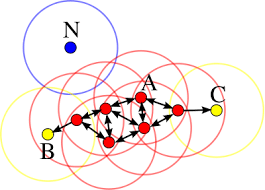
 
## Algorithm

1. DBSCAN Plot the data points in space
2. Depending upon the conditions of eps value and MinPts value, each point is evaluated and identified as Core point, Berder point or Noisy point.
3. Clusters ae formed by separrating the dense regions of Core points and Border points.
4. Noisy points are not taken into account by DBSCAN algorithm.

## Advantages 
1. Separates the high density clusters and low density clusters very well as compare to KMeans.
2. Outliers are handled in effective way by treating them as Nois points.
3. It performs better in certain problems where clusters formed by Kmeans are not reliable. e.g. when clusters are in spherical shapes as follows. Kmeans cannot handle those clusters, but DBSCAN does great job.

## Disadvantages
1. Does not works well when dealing with clusters of varying density. When density is consistent then DBSCAN cannot distinguish the clusters.
2. Works with only Low dimensional datas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [2]:
data = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/Mall_Customers_preprocessed.csv')
data.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


### Getting Features out of data as DBSCAN can works only with lower dimensions

In [7]:
x = data.iloc[:, [2,3]].values

# 2. DBSCAN for clustering

DBSCAN(
    **eps=0.5,
    *,
    **min_samples** = 5,
    **metric** = 'euclidean',
    **metric_params** = None,
    **algorithm** = 'auto',
    **leaf_size** = 30,
    **p** = None,
    **n_jobs** = None,
)


Parameters
----------
**`eps`** : float, default=0.5
    The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set
and distance function.

**`min_samples`** : int, default=5
    The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

**`metric`** : string, or callable, default='euclidean'
    The metric to use when calculating distance between instances in a feature array.

**`metric_params`** : dict, default=None
    Additional keyword arguments for the metric function.

**`algorithm`** : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
    The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. 

**`leaf_size`** : int, default=30
    Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

**`p`** : float, default=None
    The power of the Minkowski metric to be used to calculate distance between points. If None, then ``p=2`` (equivalent to the Euclidean distance).

**`n_jobs`** : int, default=None
    The number of parallel jobs to run.
    ``None`` means 1
    ``-1`` means using all processors.
    
Attributes
----------

**`core_sample_indices_`** : ndarray of shape (n_core_samples,)
    Indices of core samples.

**`components_`** : ndarray of shape (n_core_samples, n_features)
    Copy of each core sample found by training.

**`labels_`** : ndarray of shape (n_samples)
    Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

In [24]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=3, min_samples=4, metric="euclidean")

dbscan_model.fit(x)

labels = dbscan_model.labels_

labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

# 3. Clusters of Model

### Creating the bool array

In [26]:
core_indices_list = np.zeros_like(labels, dtype=bool)
core_indices_list

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

### Changing the Indices having Core or Border points to true in bool array 

In [27]:
core_indices_list[dbscan_model.core_sample_indices_] = True
core_indices_list

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,

### Getting the Set of distinct labels

In [28]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

### Getting the number of clusters

In [29]:
len(set(labels)) - (1 if -1 in labels else 0)

9

# 4. Visualizing the clusters

In [44]:
label = dbscan_model.fit_predict(x)
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [45]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [46]:
x[label==0,0]

array([44, 44, 46, 46, 47, 48, 48, 48, 48, 50], dtype=int64)

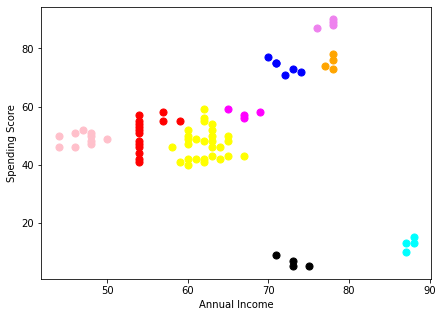

In [47]:
plt.figure(figsize=(7,5))
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.scatter(x[label==0,0], x[label==0,1], s=50, c='pink')
plt.scatter(x[label==1,0], x[label==1,1], s=50, c='red')
plt.scatter(x[label==2,0], x[label==2,1], s=50, c='yellow')
plt.scatter(x[label==3,0], x[label==3,1], s=50, c='magenta')
plt.scatter(x[label==4,0], x[label==4,1], s=50, c='blue')
plt.scatter(x[label==5,0], x[label==5,1], s=50, c='black')
plt.scatter(x[label==6,0], x[label==6,1], s=50, c='violet')
plt.scatter(x[label==7,0], x[label==7,1], s=50, c='orange')
plt.scatter(x[label==8,0], x[label==8,1], s=50, c='cyan')